<a href="https://colab.research.google.com/github/kumarsujal23/HazardousClassifier/blob/main/HazardousClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Importing necessary libraries for data manipulation, visualization, and statistical analysis
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
path="/content/drive/My Drive/Colab Notebooks/dataset.csv" # Defining the path to the dataset file
df=pd.read_csv(path)  #Loading the dataset into a pandas DataFrame
actual_df = df.copy() #Making a copy of the original dataset for reference and backup
df.head(5) # Display the first 5 rows of the dataset to get an overview of its structure and contents

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,NaN,...,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.346095,40519.173105,NaN,NaN,57298148.0,35603420.0,NaN,...,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,4.557,...,1.966857,2.458120e+06,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,NaN,NaN,NaN,26522368.0,5.093,...,1.527904,2.457902e+06,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,158.646713,61010824.0,NaN,5.154,...,NaN,2.457814e+06,NaN,NaN,NaN,NaN,15.0,NaN,Low,True


In [59]:
warnings.simplefilter(action='ignore') # For Suppressing all warning messages to prevent them from cluttering the output

## ***1. EXPLORATORY DATA ANALYSIS***

### ***1.1  Data Inspection***

In [60]:
df.shape #  To Get the dimensions of the DataFrame (number of rows and columns)

(4534, 24)

Knowing Shape of data is the very first step of Data Inspection. The shape (4534,24) says there are 4534 data points and each data point has 24 different features

In [61]:
print(df.info()) #Printing a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4534 non-null   int64  
 1   Epoch Date Close Approach     3280 non-null   float64
 2   Relative Velocity km per sec  3184 non-null   object 
 3   Relative Velocity km per hr   3033 non-null   float64
 4   Miles per hour                3668 non-null   float64
 5   Miss Dist.(Astronomical)      3933 non-null   float64
 6   Miss Dist.(lunar)             3417 non-null   float64
 7   Miss Dist.(kilometers)        3166 non-null   float64
 8   Miss Dist.(miles)             3882 non-null   float64
 9   Jupiter Tisserand Invariant   2802 non-null   float64
 10  Epoch Osculation              3007 non-null   float64
 11  Semi Major Axis               3346 non-null   float64
 12  Asc Node Longitude            3438 non-null   float64
 13  Per

It can be seen that there is one ***int64*** feature called "Name" , 3 ***object*** class Ordinal Features and all the other features being ***float64*** dtype.



In [62]:
df.describe().T #For Generating descriptive statistics for numerical columns in the DataFrame,

,count,mean,std,min,25%,50%,75%,max
Name,4534.0,3.268624e+06,5.517954e+05,2.000433e+06,3.092344e+06,3.513224e+06,3.691155e+06,3.781897e+06
Epoch Date Close Approach,3280.0,1.178921e+12,1.986535e+11,7.889472e+11,1.014365e+12,1.202458e+12,1.354954e+12,1.473318e+12
Relative Velocity km per hr,3033.0,5.051697e+04,2.653014e+04,1.207815e+03,3.043742e+04,4.696825e+04,6.521035e+04,1.606815e+05
Miles per hour,3668.0,3.131246e+04,1.638618e+04,7.504891e+02,1.884339e+04,2.895942e+04,4.033194e+04,9.984123e+04
Miss Dist.(Astronomical),3933.0,2.582210e-01,1.460704e-01,1.778761e-04,1.358070e-01,2.652806e-01,3.870335e-01,4.998841e-01
Miss Dist.(lunar),3417.0,1.007099e+02,5.693874e+01,1.876690e-01,5.287751e+01,1.042615e+02,1.504344e+02,1.943596e+02
Miss Dist.(kilometers),3166.0,3.842441e+07,2.207442e+07,2.660989e+04,1.950318e+07,3.987901e+07,5.769962e+07,7.478160e+07
Miss Dist.(miles),3882.0,2.391178e+07,1.357595e+07,1.653462e+04,1.246634e+07,2.476464e+07,3.581782e+07,4.646713e+07
Jupiter Tisserand Invariant,2802.0,5.126265e+00,1.197144e+00,2.367000e+00,4.179250e+00,5.102500e+00,6.043000e+00,9.025000e+00
Epoch Osculation,3007.0,2.457720e+06,9.248399e+02,2.450936e+06,2.458000e+06,2.458000e+06,2.458000e+06,2.458000e+06


Above is the basic  statistical values of numeric data

**shows percentage of null values in each feature**

In [63]:
(df.isnull().sum()/df.shape[0]*100)#shows percentage of null values in each feature

,0
Name,0.000000
Epoch Date Close Approach,27.657697
Relative Velocity km per sec,29.775033
Relative Velocity km per hr,33.105426
Miles per hour,19.100132
Miss Dist.(Astronomical),13.255404
Miss Dist.(lunar),24.636083
Miss Dist.(kilometers),30.172034
Miss Dist.(miles),14.380238
Jupiter Tisserand Invariant,38.200265


**Overall null values percentage in the dataset**

In [64]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100 # Calculating the percentage of missing values in the DataFrame

23.32193795030143

***Filling the null values with it forward values in datasets for features Epoch Date Close Approach,Epoch Osculation, approach_year,approach_month,approach_day***

In [65]:
df['Epoch Date Close Approach']=df['Epoch Date Close Approach'].bfill() # Backfill missing values in 'Epoch Date Close Approach'
df['Epoch Osculation']=df['Epoch Osculation'].bfill() # Backfill missing values in 'Epoch Osculation'
df['Epoch Osculation']=df['Epoch Osculation'].ffill() # Forward fill missing values in 'Epoch Osculation'
df['approach_year']=df['approach_year'].bfill() # Backfill missing values in 'approach_year'
df['approach_month']=df['approach_month'].bfill()  # Backfill missing values in 'approach_month'
df['approach_day']=df['approach_day'].bfill() # Backfill missing values in 'approach_day
df.loc[4533, 'approach_year']=2016.0 # Setting a specific value for 'approach_year' at index 4533
df['Perihelion Time']=df['Perihelion Time'].bfill() # Backfill missing values in 'Perihelion Time'
df['Orbit Uncertainity']=df['Orbit Uncertainity'].bfill() # Backfill missing values in 'Orbit Uncertainty'

**Filling the null values of feature Miles per hour and Relative Velocity km per hr**

In [66]:
# Iterating over each row in the DataFrame
for i in range(df.shape[0]):
    # If 'Miles per hour' is missing, calculating it from 'Relative Velocity km per hr'
    if pd.isnull(df.loc[i, 'Miles per hour']):
        df.loc[i, 'Miles per hour'] = df.loc[i, 'Relative Velocity km per hr'] * 0.6213611

    # If 'Relative Velocity km per hr' is missing, calculating it from 'Miles per hour'
    if pd.isnull(df.loc[i, 'Relative Velocity km per hr']):
        df.loc[i, 'Relative Velocity km per hr'] = df.loc[i, 'Miles per hour'] / 0.6213611


**Filling the null values of features Miss Dist.(Astronomical), Miss Dist.(Lunar), Miss Dist.(Kilometers), Miss Dist.(miles)**

In [67]:
# Defining conversion factors between different distance measurements
conversion_factors = {
    'Miss Dist.(Astronomical)': {
        'Miss Dist.(lunar)': 389,  # 1 Astronomical Unit to lunar distance
        'Miss Dist.(kilometers)': 149597695,  # 1 Astronomical Unit to kilometers
        'Miss Dist.(miles)': 92955807,  # 1 Astronomical Unit to miles
    },
    'Miss Dist.(lunar)': {
        'Miss Dist.(Astronomical)': 1 / 389,  # Conversion back to Astronomical Units
        'Miss Dist.(kilometers)': 384570.3377,  # 1 lunar distance to kilometers
        'Miss Dist.(miles)': 238960.949,  # 1 lunar distance to miles
    },
    'Miss Dist.(kilometers)': {
        'Miss Dist.(Astronomical)': 1 / 149597695,  # Conversion back to Astronomical Units
        'Miss Dist.(lunar)': 1 / 384570.3377,  # Conversion to lunar distance
        'Miss Dist.(miles)': 0.6213712,  # 1 kilometer to miles
    },
    'Miss Dist.(miles)': {
        'Miss Dist.(Astronomical)': 1 / 92955807,  # Conversion back to Astronomical Units
        'Miss Dist.(lunar)': 1 / 238960.949,  # Conversion to lunar distance
        'Miss Dist.(kilometers)': 1 / 0.6213712,  # Conversion to kilometers
    }
}

# Function to fill missing distance values based on available data
def fill_distances(row):
    for source in conversion_factors:  # Iterating over distance types
        if pd.notnull(row[source]):  # Checking if source value is not null
            for target, factor in conversion_factors[source].items():  # Iterating over target types
                if pd.isnull(row[target]):  # Checking if target value is null
                    row[target] = row[source] * factor  # Calculating and fill the target value
    return row  # Return the modified row

# Applying the fill_distances function to each row of the DataFrame
df = df.apply(fill_distances, axis=1)


**Filling the null values of features Jupiter Tisserand Invariant,Semi Major Axis,Asc Node Longitude,Perihelion Arg,Mean Anomaly,Mean Motion,Aphelion Dist using KNNImputer**

In [68]:
# Defining the columns that need to be processed for missing values
col_to_be_processed = ['Jupiter Tisserand Invariant','Semi Major Axis','Asc Node Longitude','Perihelion Arg','Mean Anomaly','Mean Motion','Aphelion Dist']
temp_df = df[col_to_be_processed] # Creating a temporary DataFrame containing only the specified columns

imputer=KNNImputer(n_neighbors=20) # Initializing KNN imputer with 20 neighbors for filling missing values

imputed_df=pd.DataFrame(imputer.fit_transform(temp_df),columns=temp_df.columns) # Fitting the imputer on the temporary DataFrame and transform it
df[col_to_be_processed] = imputed_df[col_to_be_processed]# Replacing the original columns in the DataFrame with the imputed values

In [69]:
# Filtering df to include rows with < 4 null values in distance columns
df2 = df[df[['Miss Dist.(miles)','Miss Dist.(kilometers)','Miss Dist.(lunar)','Miss Dist.(Astronomical)']].isnull().sum(axis=1) < 4]
# Furthering filter df2 to include rows with < 2 null values in velocity columns
df2=df2[df2[['Miles per hour','Relative Velocity km per hr']].isnull().sum(axis=1) < 2]
# Reseting df2 index and droping the old index
df2.reset_index(drop=True, inplace=True)

**Filling of Categorical Values**

Relative Velocity km per sec categorical values depends on 'Relative Velocity km per hr feature.
Orbital Period feature categorical values depend on Semi major Axis(T^2 proportional to a^3)

In [70]:
# Iterating over each row in df2
for i in range(df2.shape[0]):
    # Checking if 'Relative Velocity km per sec' is null
    if pd.isnull(df2.loc[i, 'Relative Velocity km per sec']):
        # Classifying based on 'Relative Velocity km per hr' thresholds
        if df2.loc[i, 'Relative Velocity km per hr'] <= 41065.86259276209:
            df2.loc[i, 'Relative Velocity km per sec'] = 'Very Slow'
        elif df2.loc[i, 'Relative Velocity km per hr'] <= 80716.918732587:
            df2.loc[i, 'Relative Velocity km per sec'] = 'Slow'
        elif df2.loc[i, 'Relative Velocity km per hr'] <= 118911.1911999235:
            df2.loc[i, 'Relative Velocity km per sec'] = 'Fast'
        else:
            df2.loc[i, 'Relative Velocity km per sec'] = 'Very Fast'


In [71]:
# Iterating over each row in df2
for i in range(df2.shape[0]):
    # Checking if 'Orbital Period' is null
    if pd.isnull(df2.loc[i, 'Orbital Period']):
        # Classifying based on 'Semi Major Axis' thresholds
        if df2.loc[i, 'Semi Major Axis'] <= 1.5645:
            df2.loc[i, 'Orbital Period'] = 'Low'
        elif (df2.loc[i, 'Semi Major Axis'] >= 1.5645) & (df2.loc[i, 'Semi Major Axis'] <= 2.108):
            df2.loc[i, 'Orbital Period'] = 'Medium'
        else:
            df2.loc[i, 'Orbital Period'] = 'High'


Filling of null values in the dataset (imputation) is different for Numerical and categorical Features. For Numerical features averaging,summing,multiplication and other mathematical operations can be performed to fill the null values. On the other hand for Categorical features mathematical operations are not meaningful, it requires other methods to fill them like filling with mode,most frequent or category prediction.

In [72]:
df2.isnull().sum().sum()/df.shape[0]*100

0.0

### **1.2 STATISTICAL INFERENCE**



#### ***Numeric Data Distribution***

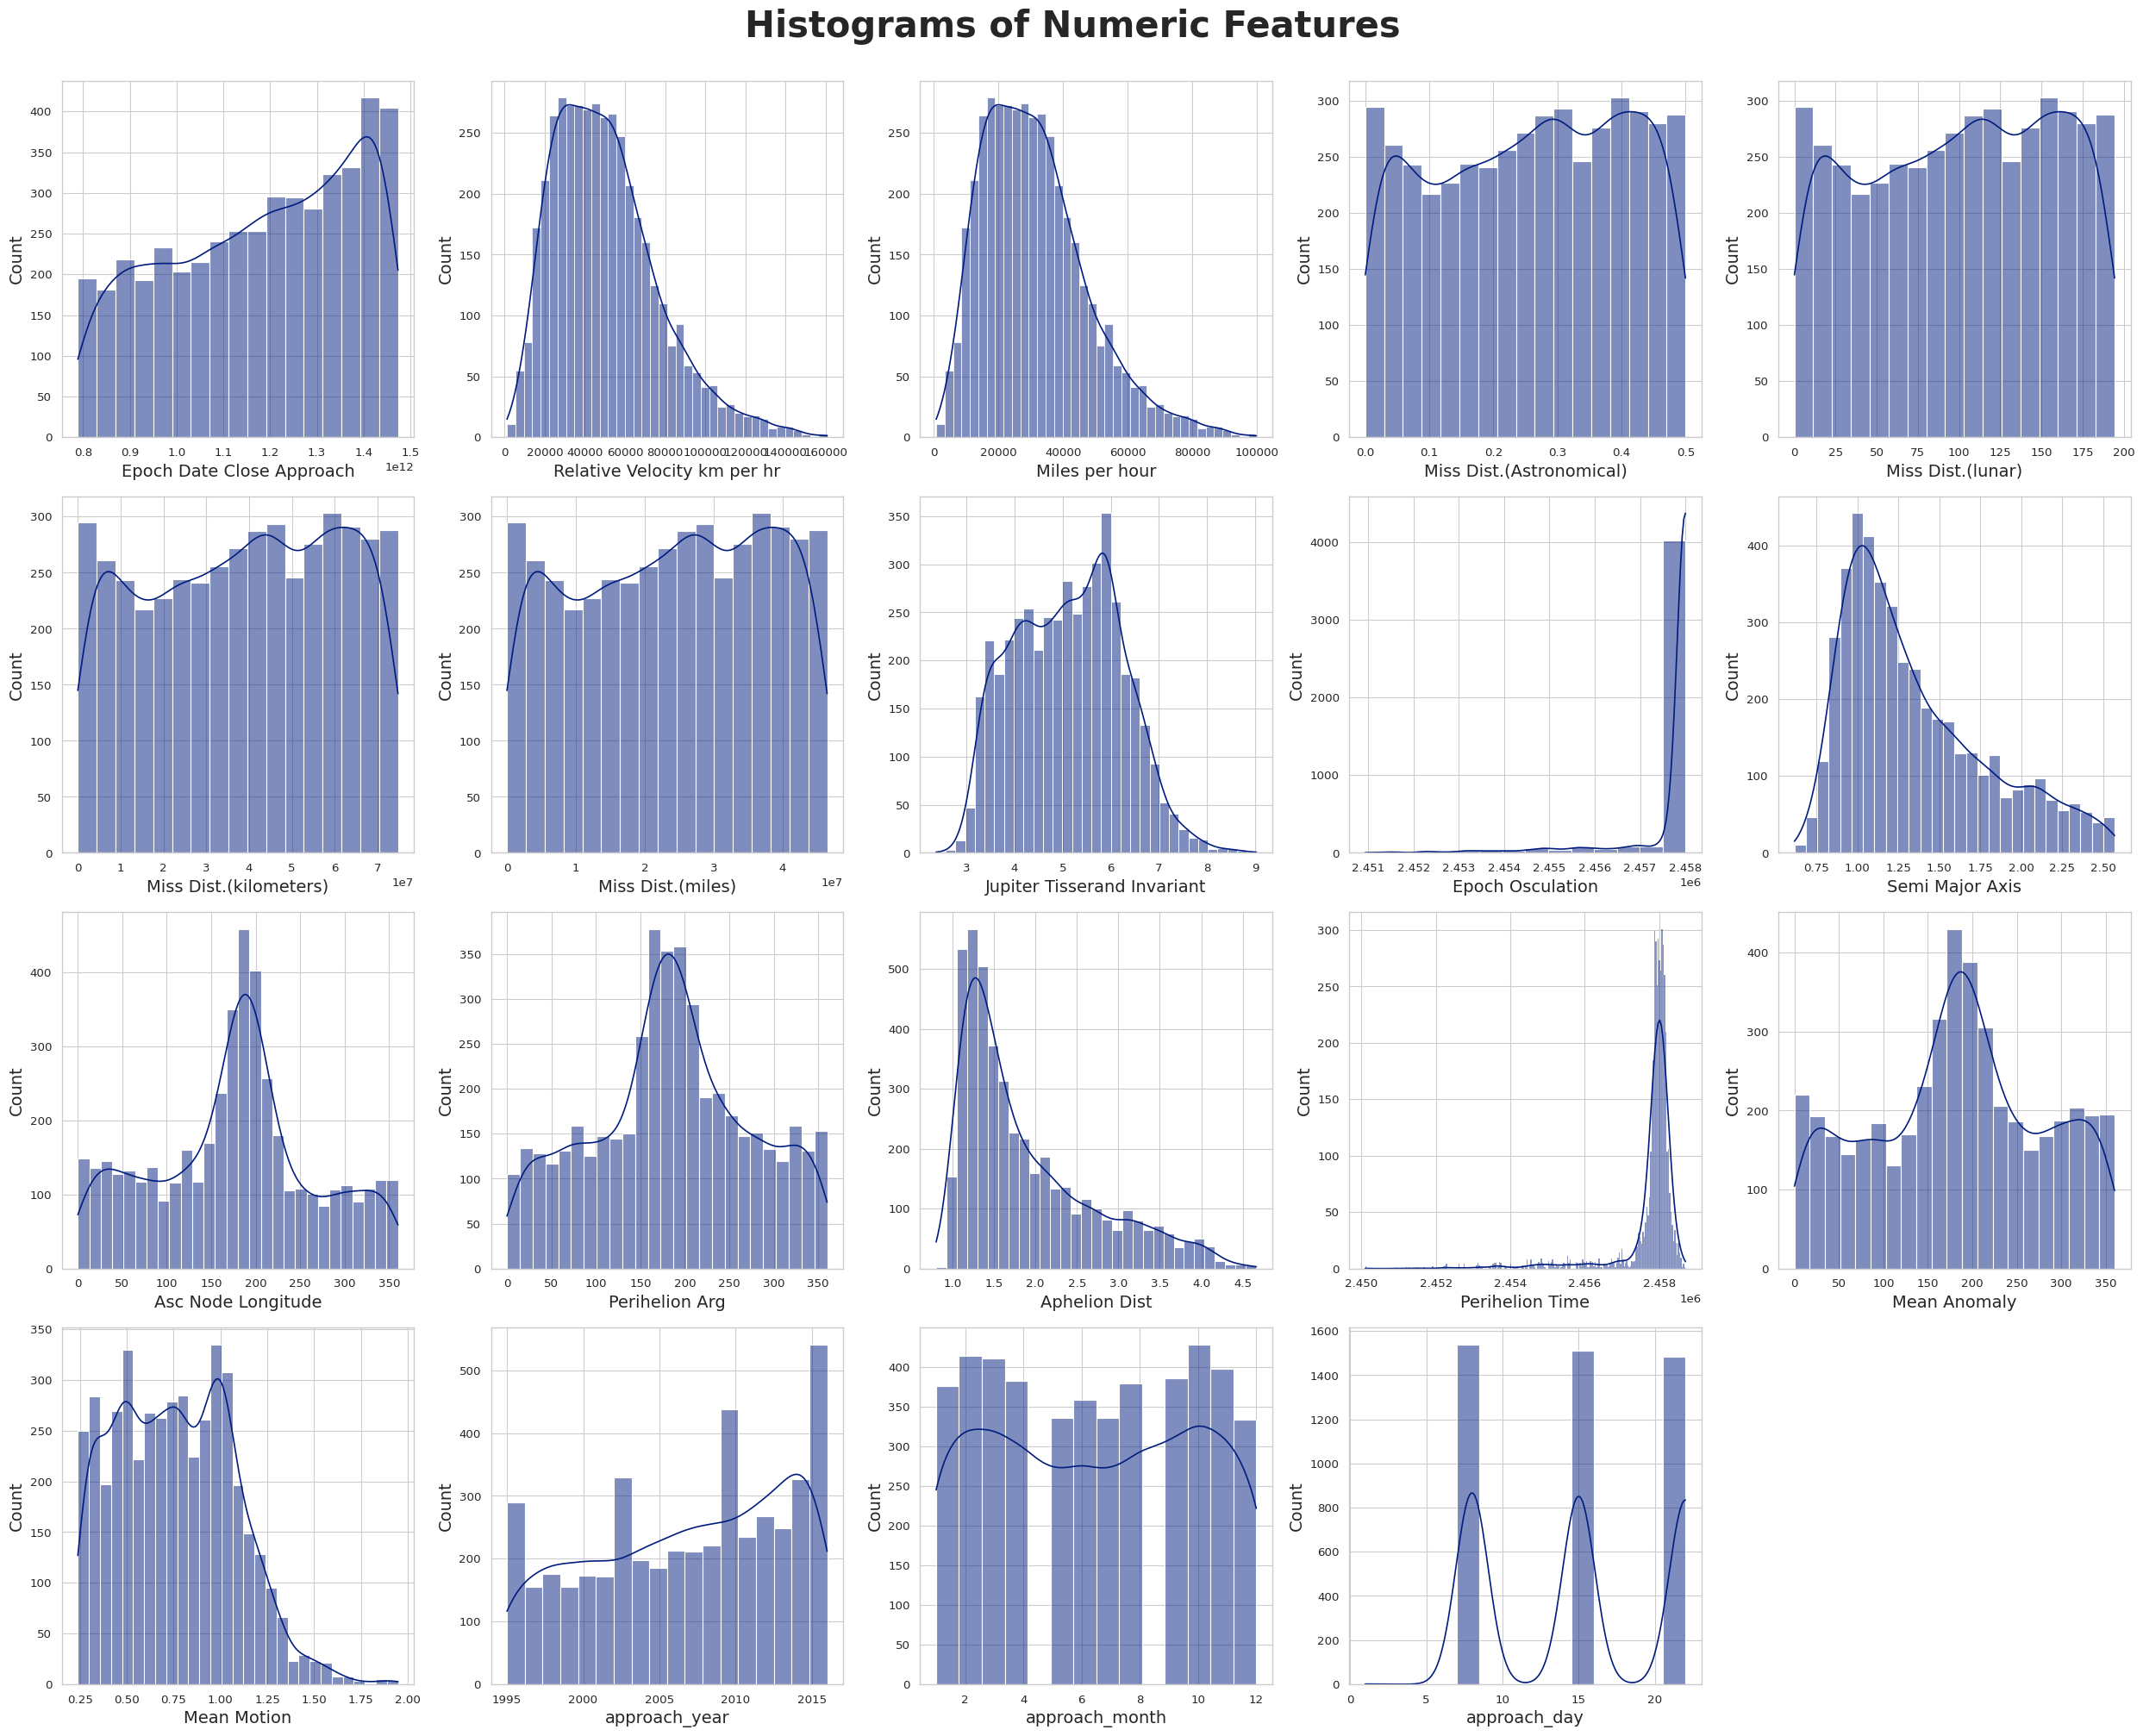

In [73]:
# Selecting numeric features from df2, excluding object and boolean types, and the 'Name' feature
numeric_features = [feature for feature in df2.columns if df2[feature].dtype not in ['O', 'bool'] and feature != 'Name']
# Defining number of columns for subplots
ncols = 5
# Calculating number of rows needed for the subplots
nrows = (len(numeric_features) + ncols - 1) // ncols

# Setting seaborn style and color palette for the plots
sns.set_style('whitegrid')
sns.set_palette('dark')
# Creating a figure with specified size
plt.figure(figsize=(25, 5 * nrows))

# Setting the title for the entire figure
plt.suptitle('Histograms of Numeric Features', fontsize=30, fontweight='bold', family='sans-serif', y=1.005)

# Iterating through numeric features to create histograms
for i, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, i + 1)  # Creating a subplot for each feature
    sns.histplot(df[feature], kde=True)  # Plotting histogram with KDE
    plt.xlabel(feature, fontsize=14)  # Setting x-axis label
    plt.ylabel('Count', fontsize=14)  # Setting y-axis label

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()  # Adjusting layout for better fitting
plt.show()  # Displaying the plots



Since the features like 'Aphelion Dist','Semi Major Axis','Relative Velocity km per hr','Miles per hour','Mean Motion' are skewed we can take logarithm of those for standardizing them

**Normalisation of skewed features Aphelion Dist,Semi Major Axis,Relative Velocity km per hr,Miles per hour,Mean Motion**



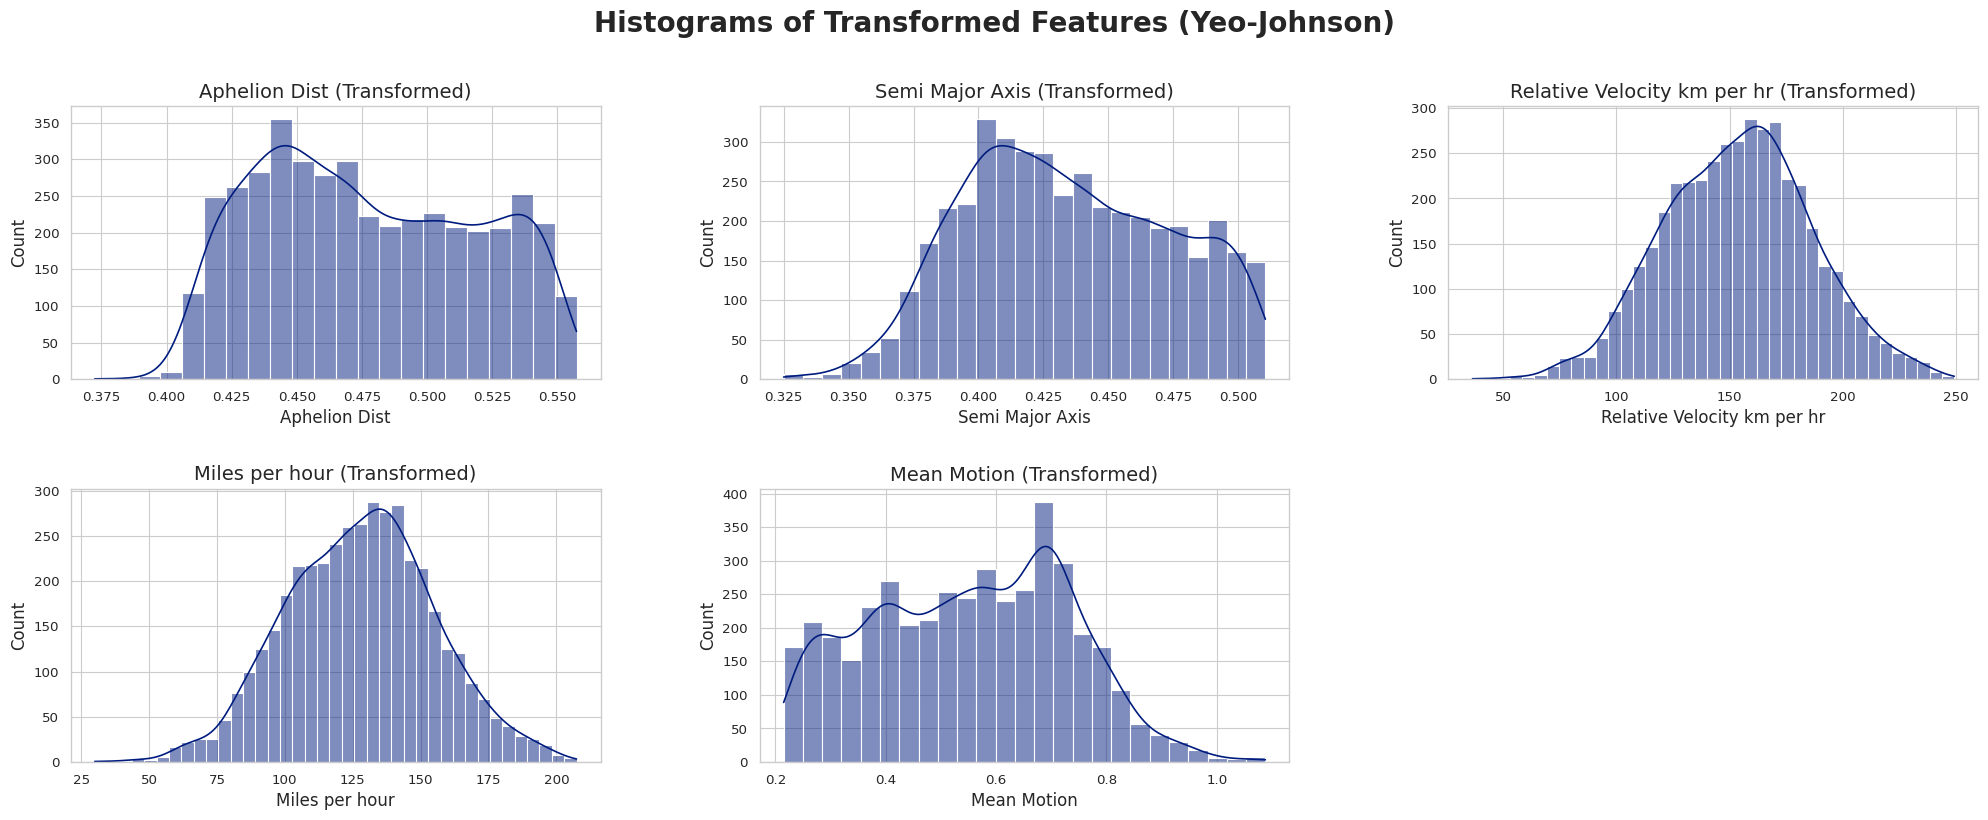

In [74]:
# Defining features to be transformed and plotted
ftrs = ['Aphelion Dist', 'Semi Major Axis', 'Relative Velocity km per hr', 'Miles per hour', 'Mean Motion']

# Setting number of columns for subplots
ncols1 = 3
# Calculating number of rows needed for the subplots
nrows1 = (len(ftrs) + ncols1 - 1) // ncols1

# Setting seaborn style for the plots
sns.set_style('whitegrid')
# Creating a figure with specified size
plt.figure(figsize=(20, 4 * nrows1))
# Setting the title for the entire figure
plt.suptitle('Histograms of Transformed Features (Yeo-Johnson)', fontsize=20, fontweight='bold', y=1.02)

# Iterating through features to apply Yeo-Johnson transformation and create histograms
for i, feature in enumerate(ftrs):
    transformed, _ = stats.yeojohnson(df2[feature])  # Transforming the feature
    df2[feature] = transformed  # Updating the feature with transformed values
    plt.subplot(nrows1, ncols1, i + 1)  # Creating a subplot for each feature
    sns.histplot(df2[feature], kde=True)  # Plotting histogram with KDE
    plt.title(f'{feature} (Transformed)', fontsize=14)  # Setting title for the subplot
    plt.xlabel(feature, fontsize=12)  # Setting x-axis label
    plt.ylabel('Count', fontsize=12)  # Setting y-axis label

# Adjusting layout for better fitting of subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.4)
plt.show()  # Displaying the plots


#### ***Identification of Outliers***

##### **Box Plots for Visualization**



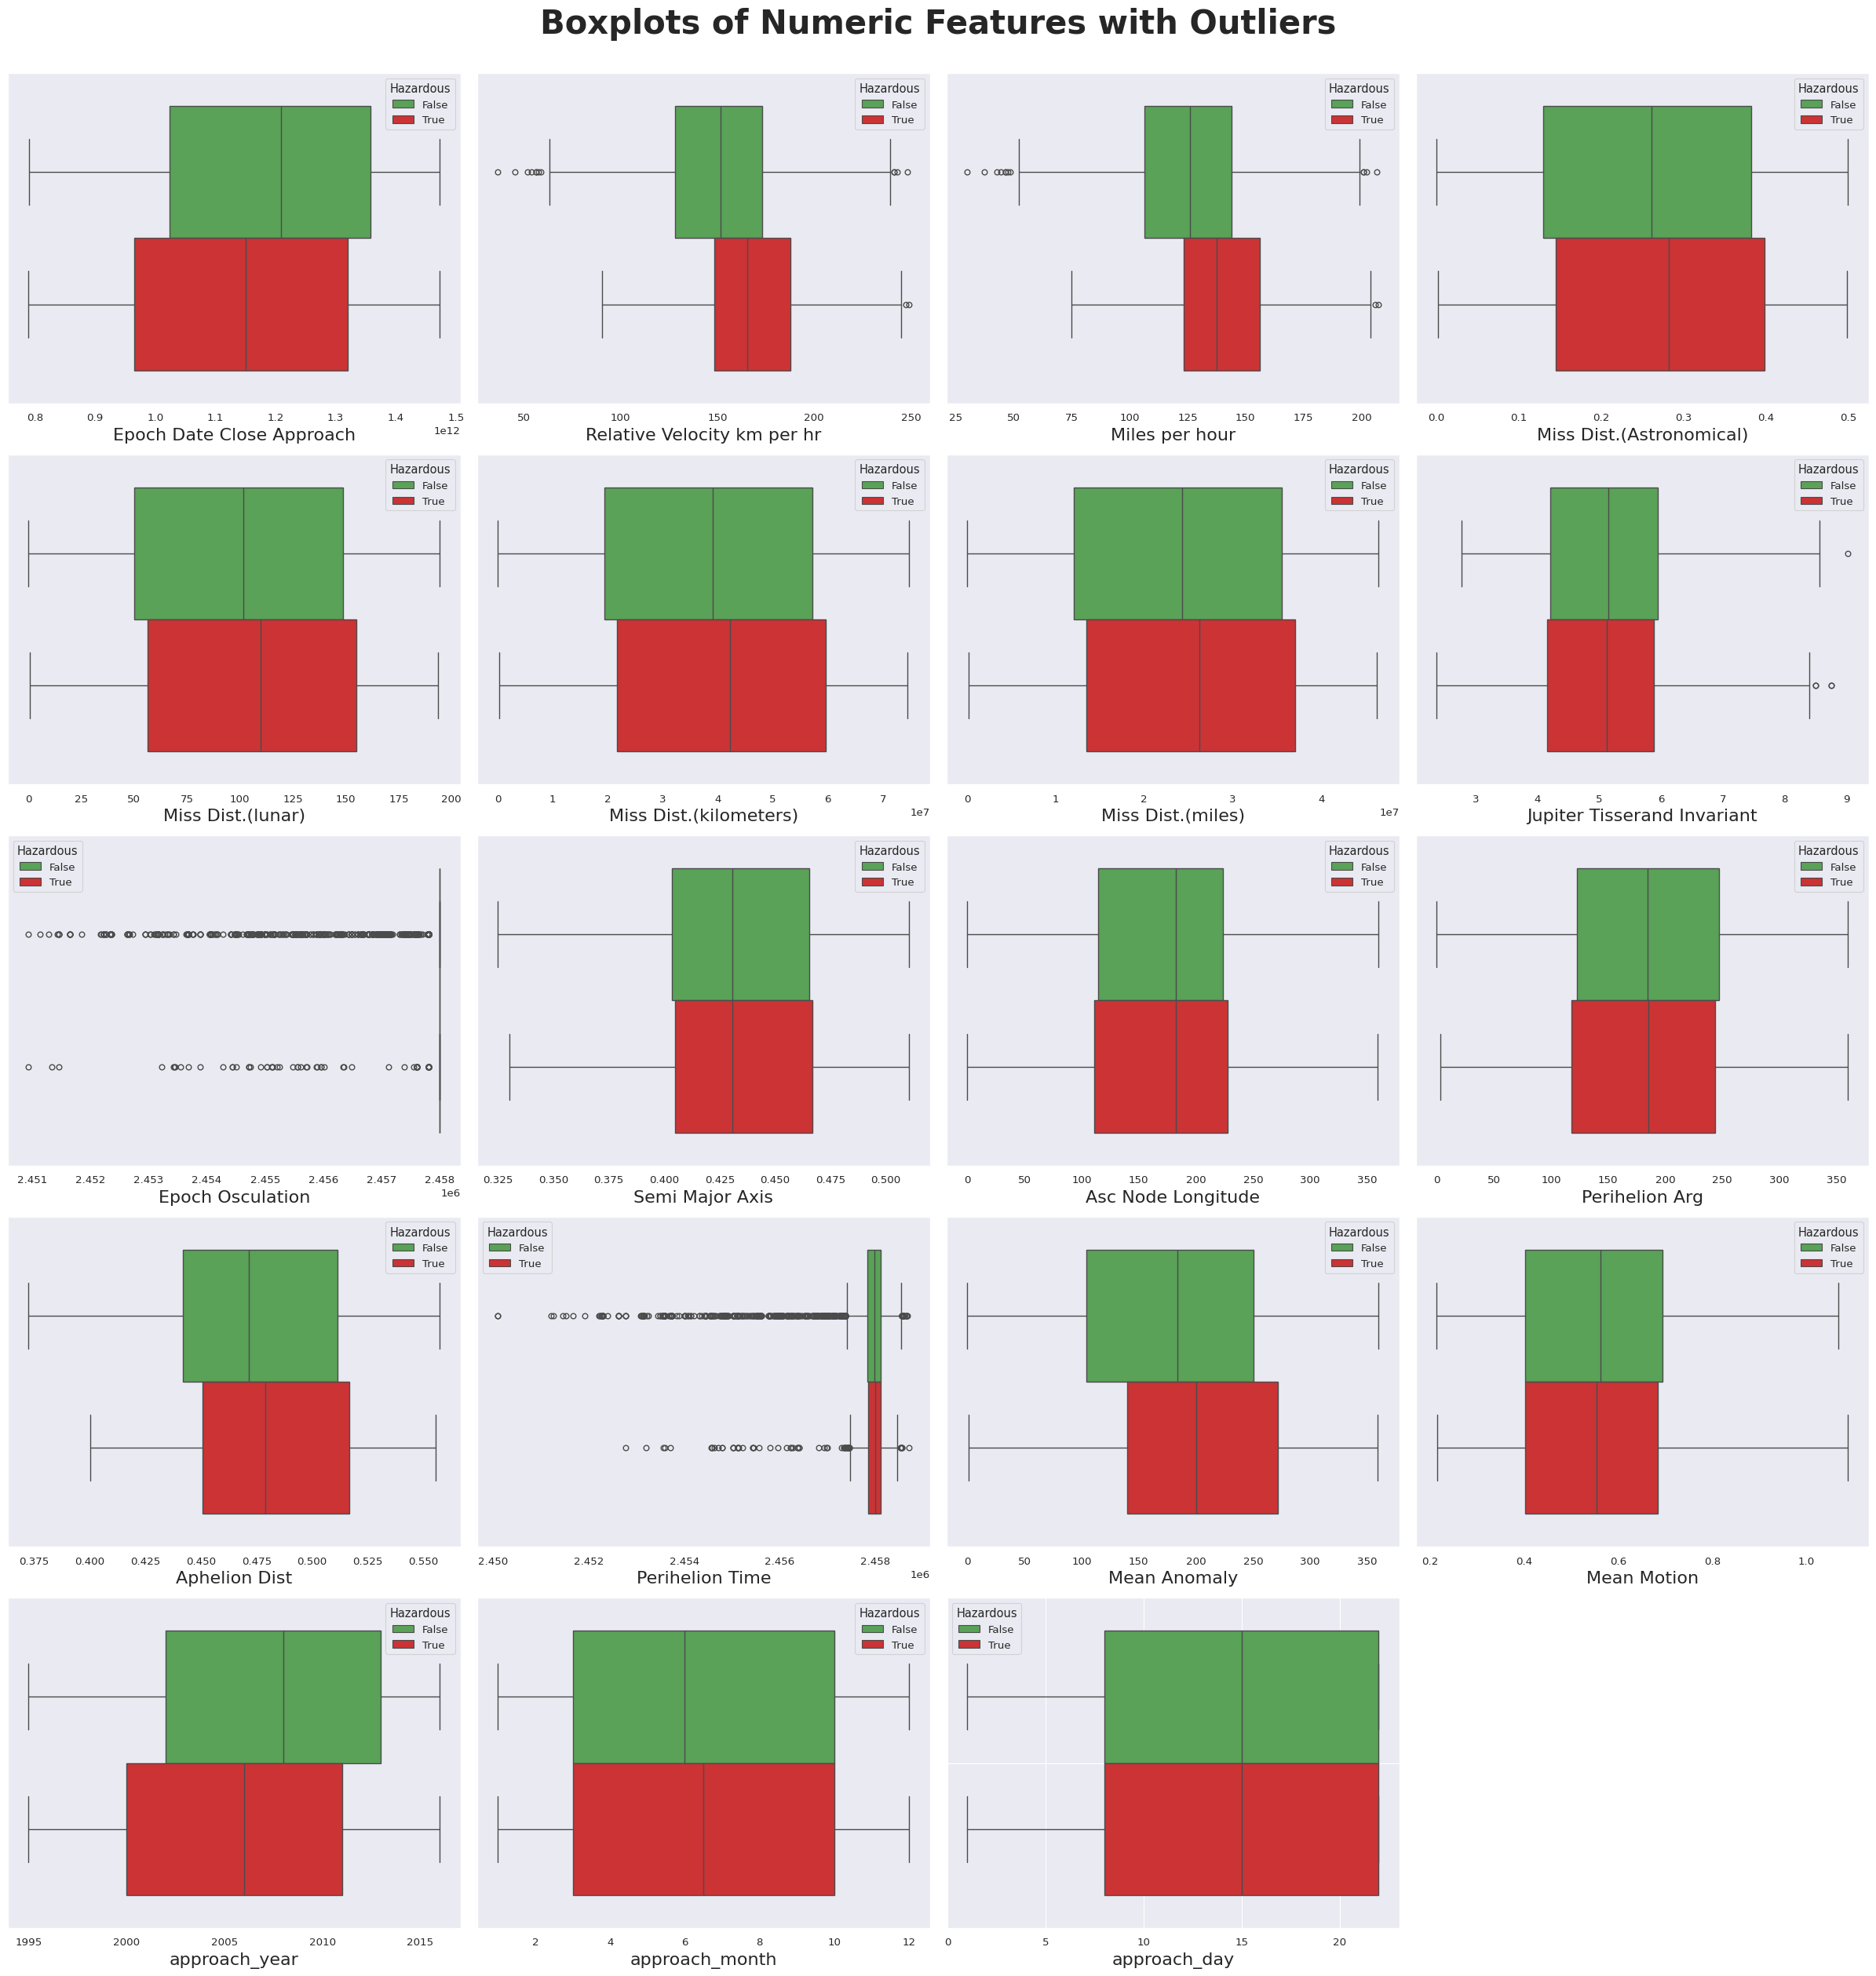

In [75]:
# Selectting numeric features from df, excluding object and boolean types, and the 'Name' feature
numeric_features = [feature for feature in df.columns if df2[feature].dtype not in ['O', 'bool'] and feature != 'Name']
# Defining number of columns for subplots
ncols = 4
# Calculating number of rows needed for the subplots
nrows = (len(numeric_features) + ncols - 1) // ncols

# Setting seaborn style and color palette for the plots
sns.set_style('dark')
sns.set_palette('dark')
# Creating a figure with specified size
plt.figure(figsize=(24, 5 * nrows))

# Setting the title for the entire figure
plt.suptitle('Boxplots of Numeric Features with Outliers', fontsize=30, fontweight='bold', family='sans-serif', y=1.005)

# Defining custom color palette for 'Hazardous' hue
custom_palette = {
    True: '#E41A1C',  # Color for Hazardous = True
    False: '#4DAF4A',  # Color for Hazardous = False
}

# Iterating through numeric features to create boxplots
for i, feature in enumerate(numeric_features):
    plt.subplot(nrows, ncols, i + 1)  # Create a subplot for each feature
    sns.boxplot(x=df2[feature], data=df2, hue='Hazardous', palette=custom_palette)  # Plot boxplot with hue
    plt.xlabel(feature, fontsize=16)  # Set x-axis label

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=5)
plt.tight_layout(pad=1.0)  # Adjusting layout for better fitting
plt.grid(True)  # Enabling grid
plt.show()  # Displaying the plots

# Suppressing future warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)


##### **Z-Score method for outliers**


In [76]:
# Creating a DataFrame containing only numeric features from df2
numeric_df = df2[numeric_features]
# Calculating z-scores for the numeric features
z_scores = stats.zscore(numeric_df)
# Getting the absolute values of the z-scores
abs_z_scores = np.abs(z_scores)
# Defining a threshold for identifying outliers
threshold = 3
# Identifying outliers based on the threshold
outliers = abs_z_scores > threshold
# Getting the row and column indices of the outliers
outlier_rows, outlier_cols = np.where(outliers)

# Initializing a counter for the number of outliers displayed
i = 0
# Iterating over the indices of the outliers
for row, col in zip(outlier_rows, outlier_cols):
    feature_name = numeric_features[col]  # Getting the feature name
    outlier_value = df2.iloc[row, df.columns.get_loc(feature_name)]  # Getting the outlier value
    print(f"Outlier in feature '{feature_name}' at index {row}: {outlier_value}")  # Printing outlier information
    i += 1  # Incrementing the counter
    if i == 10:  # Stoping after displaying 10 outliers
        break


Outlier in feature 'Epoch Osculation' at index 22: 2453548.5
Outlier in feature 'Perihelion Time' at index 22: 2453597.57543235
Outlier in feature 'Perihelion Time' at index 119: 2450100.3171166647
Outlier in feature 'Perihelion Time' at index 120: 2450100.3171166647
Outlier in feature 'Relative Velocity km per hr' at index 230: 53.72250578811653
Outlier in feature 'Miles per hour' at index 230: 44.38790511072026
Outlier in feature 'Perihelion Time' at index 402: 2454902.890482617
Outlier in feature 'Perihelion Time' at index 403: 2454902.890482617
Outlier in feature 'Perihelion Time' at index 439: 2455059.8095372645
Outlier in feature 'Epoch Osculation' at index 467: 2450936.5


#### **Relationship Between Features**

Visualizing the relationship between Features using Correlation Matrix

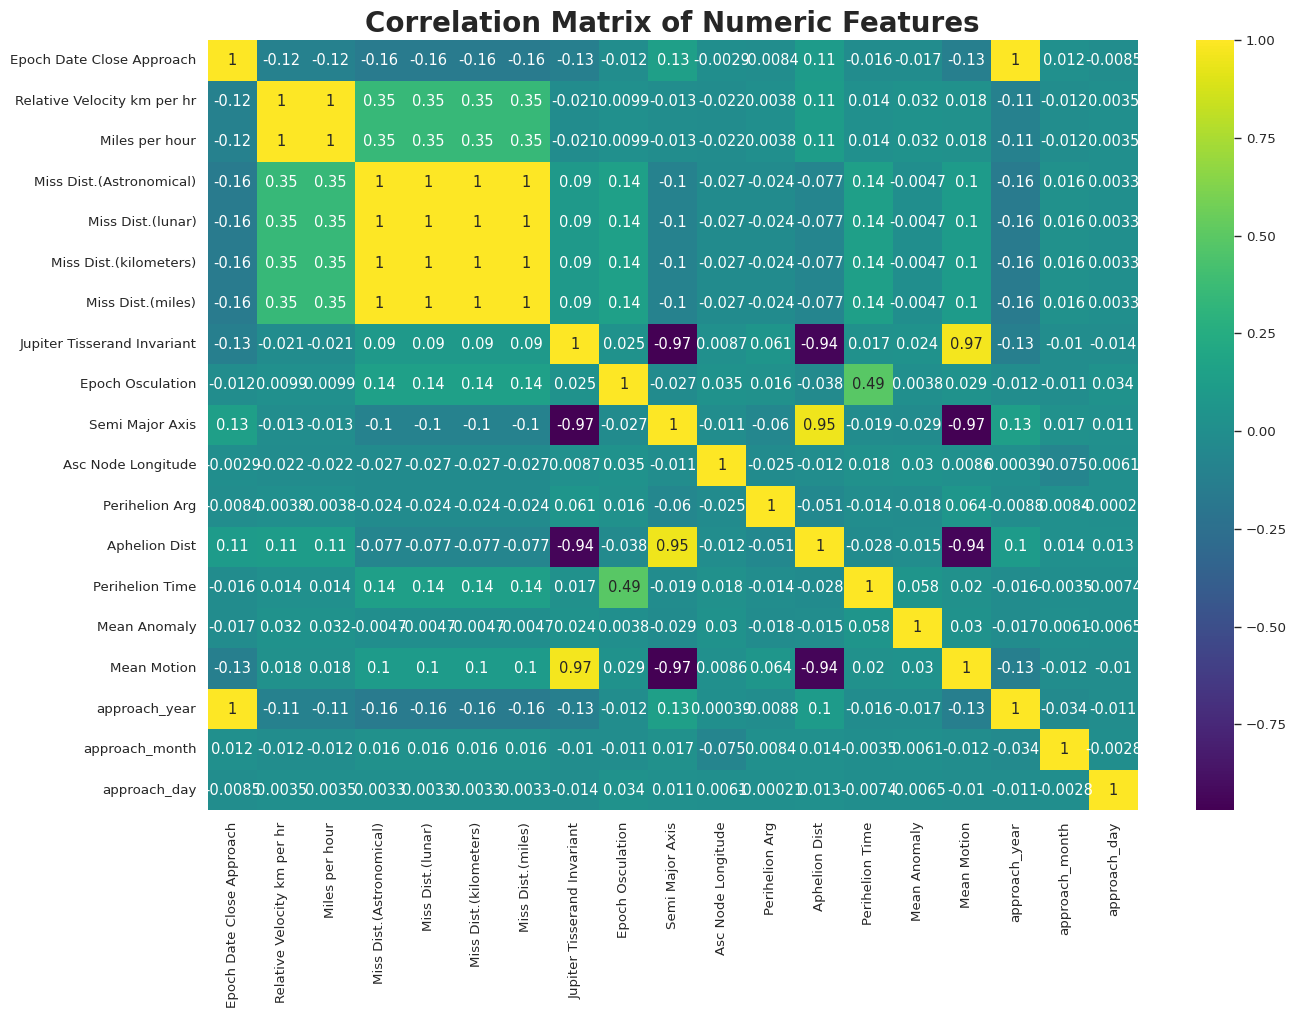

In [77]:
# Creating a figure with specified size
plt.figure(figsize=(15, 10))
# Setting seaborn context for better visualization
sns.set_context('paper', font_scale=1.1)

# Selecting numeric features from df2
numeric_df = df2[numeric_features]
# Calculating the correlation matrix of numeric features
asteroid_matrix = numeric_df.corr()

# Creating a heatmap to visualize the correlation matrix
sns.heatmap(asteroid_matrix, annot=True, cmap='viridis')
# Setting title for the heatmap
plt.title('Correlation Matrix of Numeric Features', fontsize=20, fontweight='bold')
plt.show()  # Displaying the heatmap


### ***1.3 Visualisation***

#### **Visualising multiple features at a time**

As there are a lot of features (more than 20) if all the features are plotted then the graph becomes too clumsy ,so to avoid that some of the important and that are independent from one other are considered for plotting.


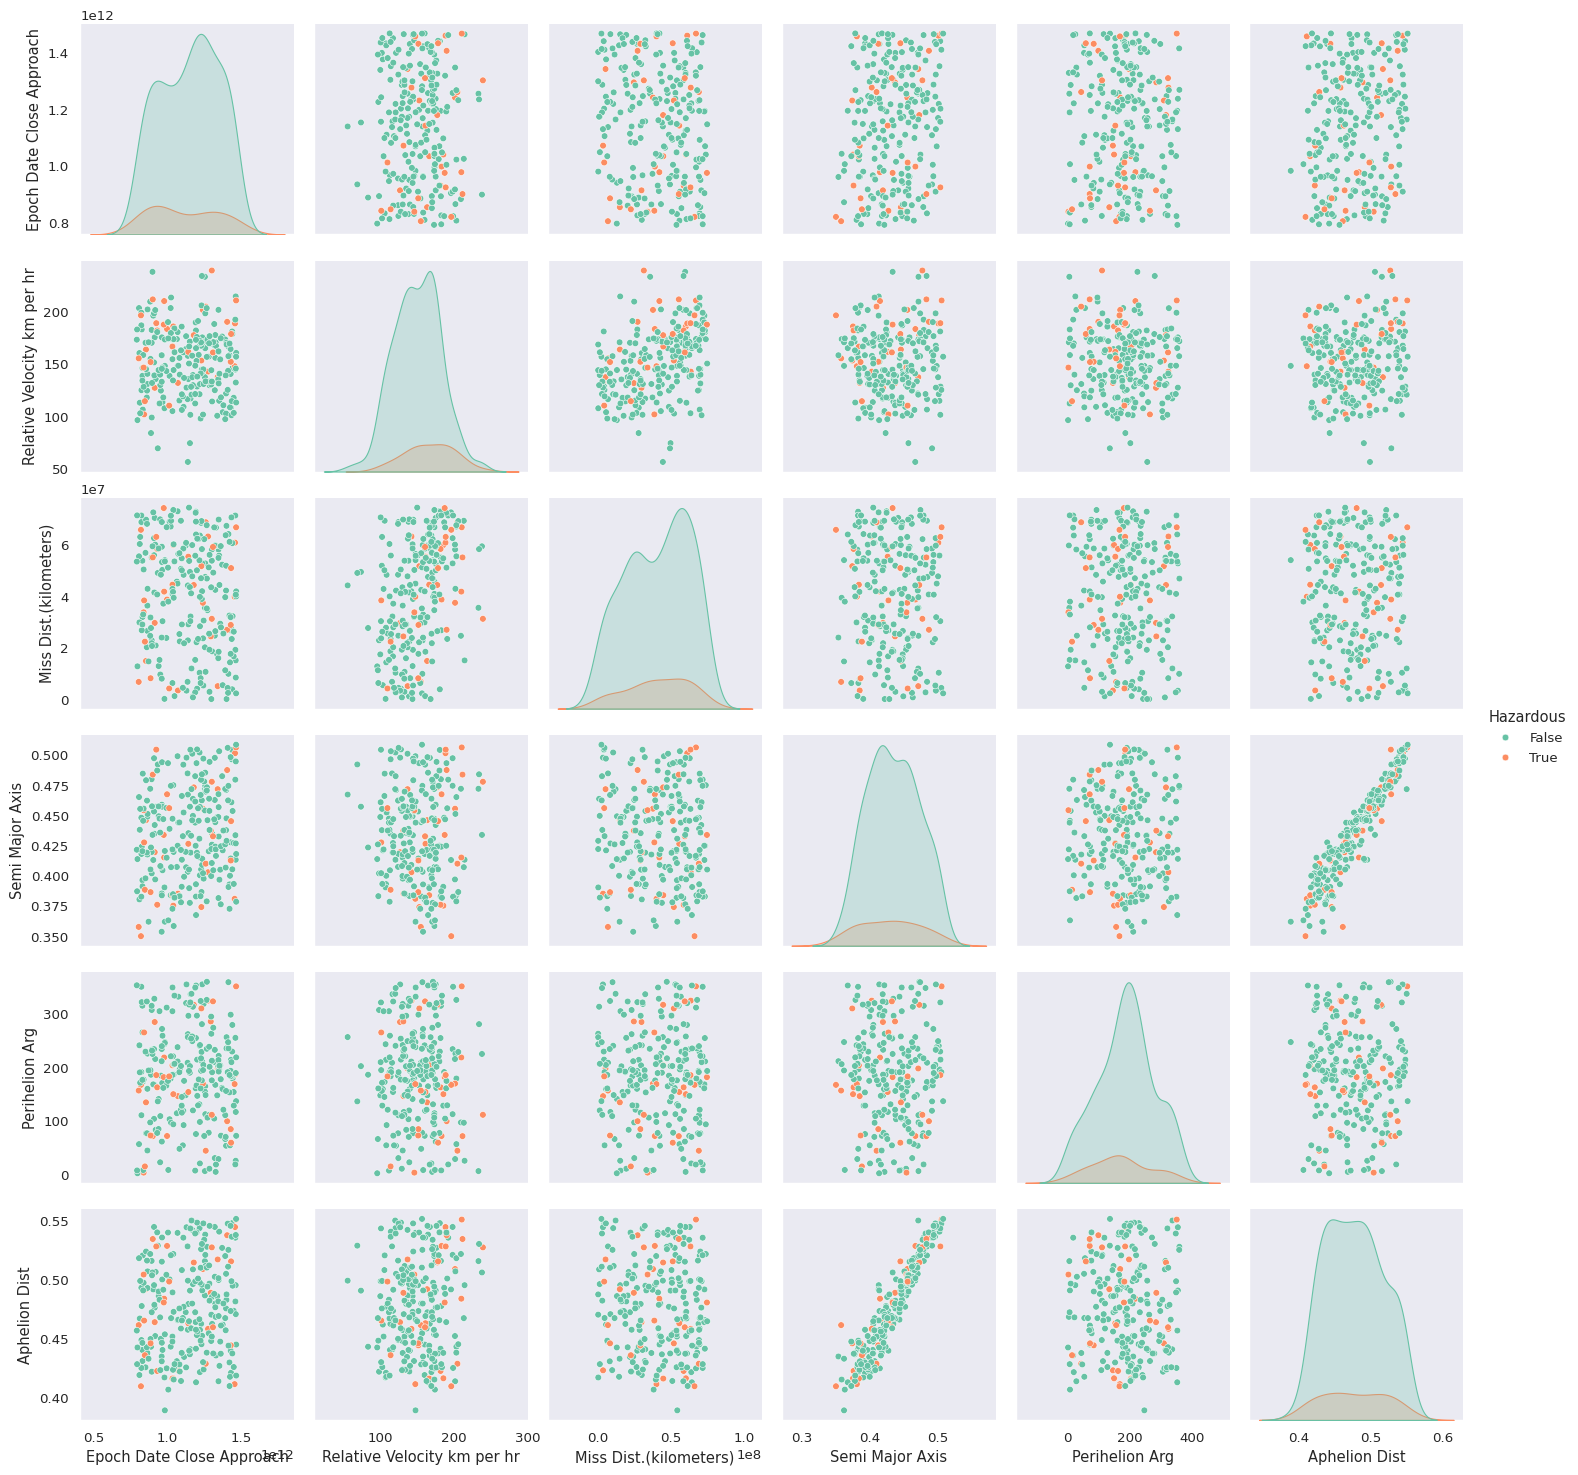

In [78]:
# Defining features for visualization
visual_features = ['Epoch Date Close Approach', 'Relative Velocity km per hr', 'Miss Dist.(kilometers)',
                  'Semi Major Axis', 'Perihelion Arg', 'Aphelion Dist']
# Randomly sampling 250 rows from df2 for visualization
sampled_df = df2.sample(n=250, random_state=42)
# Creating a pairplot for the sampled data, colored by the 'Hazardous' variable
asteroid_g = sns.pairplot(sampled_df, hue='Hazardous', vars=visual_features, palette='Set2')


In a pair plot, diagonal and off-diagonal plots serve different purposes in visualizing relationships and distributions within a dataset.

***Diagonal Plots:***

The diagonal plots display the distribution of each individual variable in the dataset.They often use kernel density estimates (KDE) to visualize how the data is distributed for each feature. You can see if the variable is normally distributed, skewed (positively or negatively), bimodal, etc.Helps identify the range of values and potential outliers in each variable.Mean and median can be inferred from the shape of the distribution.

***Off-Diagonal Plots:***

The off-diagonal plots depict the relationships between pairs of variables, usually using scatter plots or other types of bivariate plots.You can assess the strength and direction of relationships between variables. For example, a positive correlation will show a trend where one variable increases as the other does.Identify clusters, or groups within the data. If a hue parameter is included, these plots can show how different categories (e.g., Hazardous in the given dataset) influence the relationships between numerical variables.

### ***1.4 Tackling Class Imbalance***

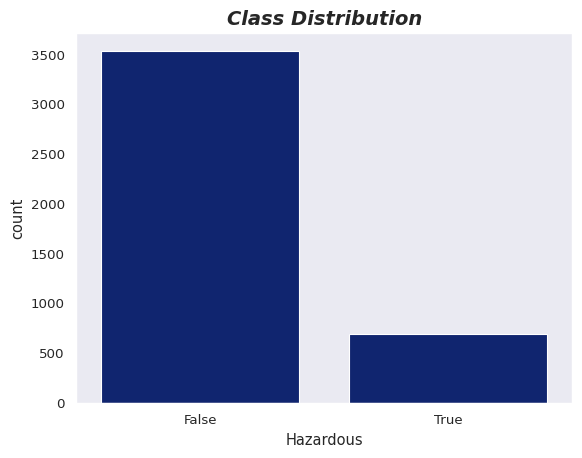

In [79]:
# Creating a count plot for the 'Hazardous' variable in df2
sns.countplot(data=df2, x='Hazardous')
# Setting the title for the plot
plt.title('Class Distribution', fontsize=14, fontstyle='italic', fontweight='bold')
plt.show()  # Displaying the plot


**Percentage of classes 'True' and 'False' in the dataset**

In [80]:
# Calculating the normalized value counts of the 'Hazardous' variable in df2
class_counts = df2['Hazardous'].value_counts(normalize=True)
# Printing the percentage distribution of each class in 'Hazardous'
print(class_counts * 100)


Hazardous
False    83.632923
True     16.367077
Name: proportion, dtype: float64


Yes Dataset is composed of class imbalance with 83.76% data for False class and 16.24% Data for True class. To tackle such problem We can Increase the number of samples in the minority class by duplicating instances or generating synthetic samples using libraries like SMOTE.Also Training Algorithms which we can use are Ensemble like boosting(Xgboost,Catboost,etc.) or SVM(Support Vector  Machine) which can deal with  class imbalance.For are Problem Statement We will be using SVM.

Class imbalance can significantly impact model performance in various ways.Models tend to predict the majority class more often thus bias towards Majority Class.The model may achieve high overall accuracy but perform poorly on the minority class, resulting in a high number of false negatives.It can also lead to misleading evaluation metrics. So as we Required to Predict whether an asteroid is hazardous or not , with True class being minority it can be biased to False class and model may predict asteroid non-Hazardous even though it is Hazardous which is dangerous in real-world situations. So dealing with class imbalance is important.

## ***2. NUMERICAL INTERPRETATION AND MATHEMATICAL ANALYSIS***

### ***2.1 Feature Engineering***

#### **Merging Approach Date ,Month ,Year to Time**

In [81]:
# Creating a 'approach_date' column by combining 'approach_year', 'approach_month', and 'approach_day' into a datetime format
df2['approach_date'] = pd.to_datetime(df2[['approach_year', 'approach_month', 'approach_day']].rename(columns={
    'approach_year': 'year',
    'approach_month': 'month',
    'approach_day': 'day'
}))

# Droping specified columns from df2 to create df3
df3 = df2.drop(['approach_year', 'approach_month', 'approach_day', 'Miss Dist.(miles)', 'Miss Dist.(kilometers)', 'Miss Dist.(lunar)'], axis=1)


In [82]:
# Calculating the ratio of 'Miss Dist.(Astronomical)' to 'Semi Major Axis' and store it in a new column
df3['MD_to_SMA_ratio'] = df3['Miss Dist.(Astronomical)'] / df3['Semi Major Axis']
# Getting the current timestamp
current_time = pd.Timestamp.now()
# Converting the current timestamp to an integer (epoch time)
current_epoch_date = int(current_time.timestamp())
# Calculating the time until approach by subtracting the current epoch date from 'Epoch Date Close Approach'
df3['Time_till_Approach'] = df3['Epoch Date Close Approach'] - current_epoch_date




 ***Eccentricity :*** Eccentricity measures the deviation of an orbit from being circular. It is a dimensionless value between 0 and 1, where 0 indicates a circular orbit, and values closer to 1 represent more elongated or elliptical orbits. It is calculated using perihelion and aphelion distances.

  $\qquad$ $\qquad$ $\qquad$ $\qquad$ $ e = \frac{r_a - r_p}{r_a + r_p} $  $\qquad$ $\qquad$ $\qquad$  $ r_a = 2a - r_p $ $\qquad$ $\qquad$ $\qquad$ $ r_a = a(1 + e) $

***Kepler's Third Law for calculating the orbital period (T) :*** The orbital period is the time it takes for an object to complete one full orbit around a central body. It depends on the semi-major axis and the mass of the central body, as described by Kepler's Third Law. The longer the orbital period, the larger the semi-major axis.




  $$ T = 2 \pi \sqrt{\frac{a^3}{GM}} $$


  ***The average orbital velocity (v) can be calculated using the formula :*** Orbital velocity is the speed at which an object must travel to maintain a stable orbit around a central body. It varies depending on the distance from the central body and is highest at perihelion and lowest at aphelion.
  $$ v = \frac{2 \pi a}{T} \quad \text{or} \quad v = \sqrt{\frac{GM}{r}} $$


In [83]:
# Calculating the periapsis distance (r_p) using the formula r_p = 2 * Semi Major Axis - Aphelion Dist
r_p = 2 * df['Semi Major Axis'] - df['Aphelion Dist']
# Calculating the eccentricity and store it in a new column in df3
df3['eccentricity'] = (df['Aphelion Dist'] - r_p) / (df['Aphelion Dist'] + r_p)
# Defining the gravitational parameter (mu = G * M)
mu = 1.327e20  # (G*M)
# Defining the conversion factor from Astronomical Units to meters
AU_to_meters = 1.496e11
# Converting Semi Major Axis from AU to meters
sma_au = df['Semi Major Axis'] * AU_to_meters
# Calculating the orbital period in seconds and store it in a new column in df3
df3['Orbital Period (seconds)'] = 2 * np.pi * np.sqrt((sma_au**3) / mu)
# Calculating the orbital velocity in m/s and store it in a new column in df3
df3['Orbital Velocity (m/s)'] = np.sqrt(mu / df['Semi Major Axis'])


***Heliocentric Distance Calculation :*** Heliocentric distance is the distance from an object (like a planet) to the Sun, measured from the center of the Sun. It is a key factor in understanding the gravitational forces acting on celestial bodies in the solar system.


$\qquad$ Aphelion Distance :
$$
r_a = a(1 + e) \qquad \text{(Aphelion Distance)}
$$
$\qquad$Perihelion Distance :
$$
r_p = a(1 - e) \quad \text{(Perihelion Distance)}
$$

***Escape Velocity :*** Escape velocity is the minimum speed an object must reach to break free from the gravitational influence of a celestial body without further propulsion. It depends on the mass and radius of the body from which the object is escaping.

   $$
   v_e = \sqrt{\frac{2\mu}{r}} \quad \text{(Escape Velocity)}
   $$

***Specific Orbital Energy :*** Specific orbital energy is the total mechanical energy (kinetic + potential) per unit mass of an orbiting body. It determines the type of orbit (bound or unbound) and is negative for bound orbits (like planets) and zero or positive for unbound orbits (like comets).
   $$
   \epsilon = -\frac{\mu}{2a} \quad \text{(Specific Orbital Energy)}
   $$

In [84]:
# Calculating the perihelion distance and store it in a new column in df3
df3['Perihelion Dist'] = df['Semi Major Axis'] * (1 - df3['eccentricity'])
# Calculating the escape velocity at perihelion (in km/s) and store it in df3
df3['Escape Velocity at Perihelion (km/s)'] = np.sqrt(2 * mu / (df3['Perihelion Dist'] * AU_to_meters)) / 1000.0
# Calculating the escape velocity at aphelion (in km/s) and store it in df3
df3['Escape Velocity at Aphelion (km/s)'] = np.sqrt(2 * mu / (df3['Aphelion Dist'] * AU_to_meters)) / 1000.0
# Calculating the specific orbital energy and store it in df3
df3['Specific Orbital Energy'] = -mu / (2 * df['Semi Major Axis'] * AU_to_meters)


***Specific Angular Momentum :*** The specific angular momentum ℎ quantifies the rotational motion of an orbiting body. It is determined by the gravitational constant 𝐺, the mass 𝑀 of the central body (such as a star or planet), the semi-major axis 𝑎 of the orbit, and the eccentricity 𝑒 which describes the shape of the orbit. A higher specific angular momentum indicates a more stable orbit, as it reflects the balance between gravitational attraction and the inertia of the orbiting body.
   $$
   h = \sqrt{G M a (1 - e^2)} \quad \text{(Specific Angular Momentum)}
   $$

***Velocity at Perihelion :***The velocity at perihelion 𝑣𝑝 is the speed of an orbiting body at its closest approach to the central body (the point of perihelion). This velocity is influenced by the gravitational force acting on the body and its distance from the central mass. As the body gets closer to the central mass, it moves faster due to the increased gravitational pull, leading to a higher velocity at perihelion compared to other points in its orbit.
   $$
   v_p = \sqrt{G M \left( \frac{2}{r_p} - \frac{1}{a} \right)} \quad \text{(Velocity at Perihelion)}
   $$

***Velocity at Aphelion :***The velocity at aphelion 𝑣𝑎 is the speed of an orbiting body at its farthest point from the central body (the point of aphelion). At this point, the gravitational force is weaker due to the increased distance from the central mass, resulting in a lower velocity compared to the perihelion. This relationship between distance and velocity illustrates Kepler's laws of planetary motion, where an orbiting body moves faster when closer to the central mass and slower when farther away.


   $$
   v_a = \sqrt{G M \left( \frac{2}{r_a} - \frac{1}{a} \right)} \quad \text{(Velocity at Aphelion)}
   $$

In [85]:
# Calculating the specific angular momentum and store it in a new column in df3
df3['Specific Angular Momentum'] = np.sqrt(mu * df['Semi Major Axis'] * (1 - (df3['eccentricity'] ** 2)))
# Calculating variables a, b, and c for further velocity calculations
a = 1 / df['Semi Major Axis']
b = 2 / df3['Perihelion Dist']
c = 2 / df['Aphelion Dist']
# Calculating the velocity at perihelion and store it in df3
df3['Velocity at Perihelion'] = np.sqrt((mu * (b)) - a)
# Calculating the velocity at aphelion and store it in df3
df3['Velocity at Aphelion'] = np.sqrt((mu * (c)) - a)


c = 2 / df['Aphelion Dist']
# Calculating the velocity at perihelion and store it in df3
df3['Velocity at Perihelion'] = np.sqrt((mu * b) - a)
# Calculating the velocity at aphelion and store it in df3
df3['Velocity at Aphelion'] = np.sqrt((mu * c) - a)


***Synodic Period :*** The time interval between consecutive alignments of a celestial body as viewed from Earth. It accounts for both the orbit of the celestial body and the orbit of Earth itself.
$$
S = \frac{1}{\left| \frac{1}{P} - \frac{1}{T} \right|} \quad \text{(Synodic Period)}
$$
***Mean Motion :*** The average rate at which a celestial object travels along its orbit, expressed as the angle (in radians) it covers per unit of time, typically per year. It indicates how fast the object moves in its elliptical path around a central body.
$$
n = \frac{2\pi}{P} \quad \text{(Mean Motion)}
$$


In [86]:
# Defining the orbital period of Earth in seconds (1 year = 365.25 days)
P_earth = 365.25 * 86400

# Calculating the synodic period (in seconds) and store it in df3
df3['Synodic Period (seconds)'] = 1 / (1 / P_earth - 1 / df3['Orbital Period (seconds)'])
# Calculating the mean motion (in radians/second) and store it in df3
df3['Mean Motion (radians/sec)'] = 2 * np.pi / df3['Orbital Period (seconds)']


### ***2.2  Additional Features***






***Velocity Ratio :***  The Velocity Ratio is a measure of the asteroid's relative velocity compared to its escape velocity. The relative velocity indicates how fast the asteroid is approaching Earth (or another celestial body), while the escape velocity is the minimum speed needed to break free from a gravitational field without further propulsion. A high Velocity Ratio suggests that the asteroid is moving rapidly in relation to its gravitational binding energy, which may increase the risk of collision.

 The perihelion is the point where the asteroid is closest to the Sun, and typically, objects have higher orbital speeds at this point due to stronger gravitational pull. Using the escape velocity at perihelion may be more relevant for understanding how quickly an asteroid could escape the Sun's gravitational influence when it is nearest.


$$
\text{Velocity Ratio} = \frac{\text{Relative Velocity (km/s)}}{\text{Escape Velocity (km/s)}}
$$

***Orbital Inclination :*** The orbital inclination indicates the tilt of an asteroid's orbit relative to the reference plane, typically the plane of Earth's orbit around the Sun (the ecliptic plane). A higher inclination can indicate a more chaotic or eccentric orbit, which may have implications for potential close approaches to Earth.
$$ \text{Inclination} = \left( \text{Asc Node Longitude} + \text{Perihelion Arg} \right) \mod 360 $$

***Orbital Stability Ratio :*** The Orbital Stability Ratio assesses the stability of the asteroid's orbit by measuring the ratio of the semi-major axis (average distance from the central body) to its eccentricity (how elliptical the orbit is). This feature can help predict whether the asteroid's orbit is stable over long periods.
$$
\text{Orbital Stability Ratio} = \frac{a}{e}
$$

In [87]:
# Calculating the velocity ratio (relative velocity in km/min divided by escape velocity at perihelion in km/s) and store it in df3
df3['Velocity Ratio'] = (df3['Relative Velocity km per hr'] * 60) / df3['Escape Velocity at Perihelion (km/s)']
# Calculating the orbital inclination by summing 'Asc Node Longitude' and 'Perihelion Arg', then taking modulo 360
df3['Orbital Inclination'] = (df['Asc Node Longitude'] + df['Perihelion Arg']) % 360
# Calculating the orbital stability ratio (semi-major axis divided by eccentricity) and store it in df3
df3['Orbital Stability Ratio'] = df3['Semi Major Axis'] / df3['eccentricity']


In [88]:
df3=df3.dropna()

### ***3. Handling BinnedValues***


**Modification of binned features that have an ordinal relationship**

In [89]:
# Defining ordinal categories for velocity and orbital period
ord_data = [['Very Slow', 'Slow', 'Fast', 'Very Fast']]
ord_data1 = [['Low', 'Medium', 'High']]

# Importing OrdinalEncoder for transforming categorical data
from sklearn.preprocessing import OrdinalEncoder
# Initializing ordinal encoders for relative velocity and orbital period
le = OrdinalEncoder(categories=ord_data)
le1 = OrdinalEncoder(categories=ord_data1)
le2 = OrdinalEncoder(categories=ord_data1)

# Fitting the ordinal encoders to the respective columns in df3
le.fit(df3[['Relative Velocity km per sec']])
le1.fit(df3[['Orbital Period']])
le2.fit(df3[['Orbit Uncertainity']])

# Transforming the categorical columns in df3 using the fitted encoders
df3['Relative Velocity km per sec'] = le.transform(df3[['Relative Velocity km per sec']])
df3['Orbital Period'] = le1.transform(df3[['Orbital Period']])
df3['Orbit Uncertainity'] = le2.transform(df3[['Orbit Uncertainity']])


**Modification of binned features that do not have an ordinal relationship**

In [90]:
# Importing LabelEncoder for encoding categorical labels
from sklearn.preprocessing import LabelEncoder
# Initializing the label encoder
label_encoder = LabelEncoder()
# Fitting the encoder on the 'Hazardous' column and transform it to numeric labels
encoded_labels = label_encoder.fit_transform(df3['Hazardous'])
# Replacing the original 'Hazardous' column in df3 with the encoded labels
df3['Hazardous'] = encoded_labels
# Displaying the first row of the updated DataFrame
df3.head(1)


,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,Asc Node Longitude,...,Escape Velocity at Aphelion (km/s),Specific Orbital Energy,Specific Angular Momentum,Velocity at Perihelion,Velocity at Aphelion,Synodic Period (seconds),Mean Motion (radians/sec),Velocity Ratio,Orbital Inclination,Orbital Stability Ratio
0,3703080,7.889472e+11,0.0,115.530104,95.948198,0.419483,4.66965,2458000.5,0.449122,314.373913,...,59.706159,-3.152185e+08,1.236522e+10,1.812071e+10,1.150299e+10,7.872135e+07,1.192866e-07,147.957508,11.631383,1.055394


## ***4. Hazardous Classification***




### ***Classifier***

In [91]:
# Importng necessary libraries for model training and evaluation
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defining target variable 'y' and features 'X' by dropping unnecessary columns from df3
y = df3['Hazardous']
X = df3.drop(['Hazardous', 'Miles per hour', 'MD_to_SMA_ratio', 'approach_date', 'Time_till_Approach', 'Mean Motion (radians/sec)'], axis=1)

# Converting datetime columns to numeric by representing them in seconds since epoch
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = pd.to_numeric(X[col]) // 10**9


**Normalisation of dataset to fix their value between particular range using MinMaxScalar**

In [92]:
# Importing MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler
# Initializing the MinMaxScaler to scale features to the range [0, 1]
scaler = MinMaxScaler()
# Fitting the scaler to the feature data 'X' and transform it to a scaled version 'X_scaled'
X_scaled = scaler.fit_transform(X)


**SMOTE for Oversampling**

As the dataset is imbalance we are using to SMOTE to deal with it

In [119]:
np.random.seed(42)
# Initializing the SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced datasets
smote = SMOTE()
# Applying SMOTE to the scaled feature data 'X_scaled' and target variable 'y' to create a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


**Implement K-Fold Cross-Validation**

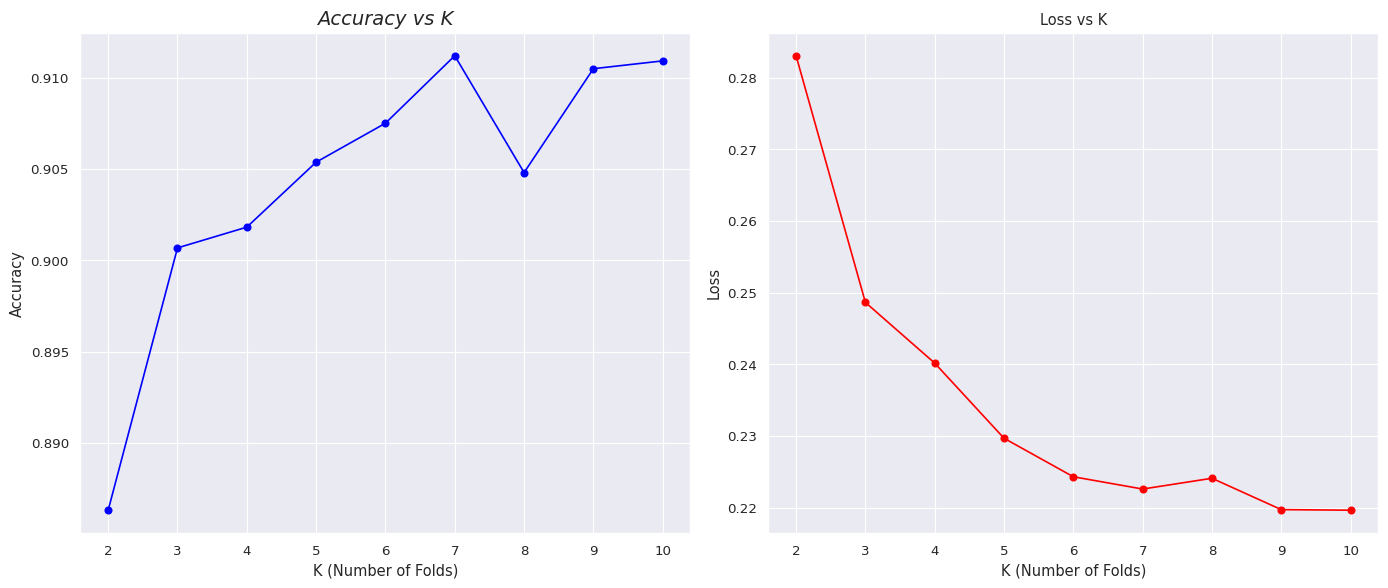

In [122]:
# Importing XGBoost for classification
import xgboost as xgb
# Initializing a dictionary to store K-Fold cross-validation scores
kf_scores = {}

# Looping over different values of K for K-Fold cross-validation (from 2 to 10)
for k in range(2, 11):
    # Initializing KFold with specified number of splits, shuffling, and a random seed
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    # Initializing the XGBoost classifier with scale_pos_weight to handle class imbalance
    model = xgb.XGBClassifier(scale_pos_weight=len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1]), random_state=42)
    # Lists to store accuracy and loss for each fold
    losses = []
    accuracies = []

    # Performing K-Fold cross-validation
    for train_index, val_index in kf.split(X_resampled):
        # Splitting the data into training and validation sets
        X_train, X_val = X_resampled[train_index], X_resampled[val_index]
        y_train, y_val = y_resampled[train_index], y_resampled[val_index]

        # Fitting the model on the training data
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        # Predicting on the validation set
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
        loss = log_loss(y_val, model.predict_proba(X_val))  # Calculate log loss

        # Appending accuracy and loss for this fold
        accuracies.append(accuracy)
        losses.append(loss)

    # Storing mean accuracy and loss for the current K value
    kf_scores[k] = {'accuracy': np.mean(accuracies), 'loss': np.mean(losses)}

# Extracting K values, accuracies, and losses for plotting
k_values = list(kf_scores.keys())
accuracies = [kf_scores[k]['accuracy'] for k in k_values]
losses = [kf_scores[k]['loss'] for k in k_values]

# Creating subplots for accuracy and loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', color='b')  # Plot accuracy vs K
plt.title('Accuracy vs K', fontsize=14, fontstyle='italic')
plt.xlabel('K (Number of Folds)')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, losses, marker='o', color='r')  # Plot loss vs K
plt.title('Loss vs K')
plt.xlabel('K (Number of Folds)')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Finding the best K with the highest accuracy
best_k = np.argmax(accuracies) + 2


**Extracting Important Features that can be used for Hyperparameter tuining**

In [123]:
# Importing necessary libraries for XGBoost and cross-validation
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Setting the number of folds for K-Fold cross-validation
k = best_k
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initializing the XGBoost classifier with a random seed and scale_pos_weight for class imbalance
model = XGBClassifier(scale_pos_weight=1, random_state=42)

# List to store feature importances from each fold
feature_importances = []

# Performing K-Fold cross-validation
for train_index, val_index in kf.split(X_resampled):
    # Splitting data into training and validation sets
    X_train, X_val = X_resampled[train_index], X_resampled[val_index]
    y_train, y_val = y_resampled[train_index], y_resampled[val_index]

    # Fitting the model on the training data
    model.fit(X_train, y_train)

    # Appending feature importances from the current fold
    feature_importances.append(model.feature_importances_)

# Calculating the average feature importance across all folds
avg_importance = np.mean(feature_importances, axis=0)

# Getting indices of the top 10 features based on average importance
top_features = np.argsort(avg_importance)[-10:]


In [124]:
# Splitting the resampled dataset into training and tuning sets, with 50% of the data used for tuning
X_tune, _, y_tune, _ = train_test_split(X_resampled, y_resampled, test_size=0.5, random_state=42)


**Hyperparameter Tuning for Support Vector Machine(Classifier) using RandomSearchCv**

In [125]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Selecting top features for model training
X_top = X_tune[:, top_features]

# Defining the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],     # Kernel coefficient for 'rbf' and 'poly'
    'kernel': ['rbf', 'linear']         # Types of kernel to be used
}

# Initializing SVC model with probability estimates
svc = SVC(probability=True, random_state=42)

# Setting up RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(svc, param_grid, n_iter=10, cv=k, verbose=2, n_jobs=-1)

# Fitting the model using the tuning set
random_search.fit(X_top, y_tune)

# Printing the best hyperparameters found
print("Best Parameters for SVM:", random_search.best_params_)
best_params = random_search.best_params_

Fitting 7 folds for each of 10 candidates, totalling 70 fits
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 100}


These best Parameters are not necessary to be the best. There can be a possibility that better parameters than them exist. Reason is that we are not doing randomSearchCv on the entire dataset and also using only some important feature.So it's not necessary that these parameters are best.

**Splitting the dataset into train and test data**

In [126]:

from sklearn.model_selection import train_test_split

# Splitting the resampled dataset into training and testing sets
# 80% of the data will be used for training, and 20% for testing
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



**Training and Predicting of model with best hyperparameter found**

**Printing of classifiaction Report and ROC accuracy**
Here we did hyperparameter tuning for better performance as RandomSearchCv did'nt give best hyparameters.

In [128]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.svm import SVC

# Initializing the SVC model with specified hyperparameters for better performance
svc = SVC(kernel='rbf', C=1, gamma=10)
# Training the model using the resampled training data
svc.fit(X_train_resampled, y_train_resampled)
# Making predictions on the test set
y_pred1 = svc.predict(X_test)
# Printing the classification report to show precision, recall, and F1 score
print(classification_report(y_test, y_pred1))
# Calculating the AUC score for the model
roc_auc = roc_auc_score(y_test, y_pred1)
# Printing the AUC score
print(f'AUC: {roc_auc:.2f}')


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.99      0.95      0.97       671

    accuracy                           0.97      1406
   macro avg       0.97      0.97      0.97      1406
weighted avg       0.97      0.97      0.97      1406

AUC: 0.97


**Checking difference between f1 score of train set and test set to know whether it's overfitting case or not**

In [129]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Making predictions on the training set
y_pred_train = svc.predict(X_train_resampled)
# Calculating F1 scores for training and test sets
train_f1 = f1_score(y_train_resampled, y_pred_train)
test_f1 = f1_score(y_test, y_pred1)
# Printing the F1 scores
print(f'Train F1 Score: {train_f1:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')
# Printing the difference between train and test F1 scores
print(train_f1 - test_f1)


Train F1 Score: 1.00
Test F1 Score: 0.97
0.03127383676582762


lower difference shows it's not a overfitting case


**Ploting of Roc Curve**

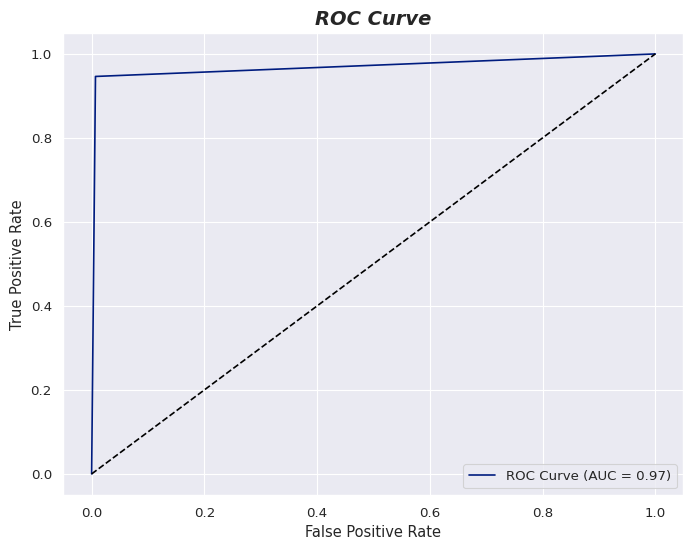

In [130]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Calculating the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
# Creating a figure for the ROC curve
plt.figure(figsize=(8, 6))
# Plotting the ROC curve with FPR on the x-axis and TPR on the y-axis
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
# Plotting the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
# Labeling the axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Setting the title for the plot
plt.title('ROC Curve',fontsize=14, fontstyle='italic', fontweight='bold')
# Showing the legend in the lower right corner
plt.legend(loc='lower right')
# Enabling grid lines for better readability
plt.grid()
# Displaying the plot
plt.show()



**Ploting of Confusion Matrice**

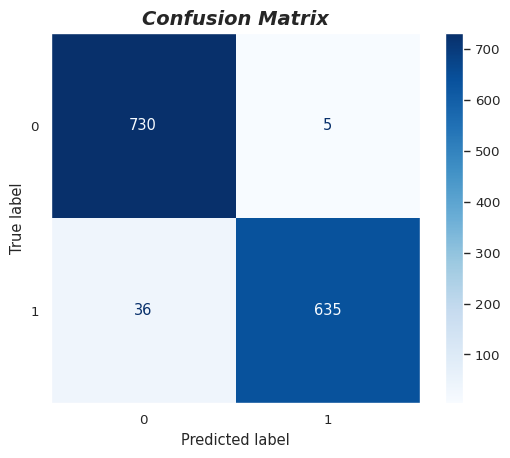

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculating the confusion matrix based on true labels and predicted labels
cm = confusion_matrix(y_test, y_pred1)
# Creating a display object for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# Plotting the confusion matrix with a blue color map
disp.plot(cmap='Blues')
# Setting the title for the confusion matrix plot
plt.title('Confusion Matrix', fontsize=14, fontstyle='italic', fontweight='bold')
# Displaying the plot
plt.show()


In [103]:
!pip install shap

**Understanding every feature's Importancy in training of the model**

we are using Shap and permutation Impoertance for the understanding the importance of features in training the model

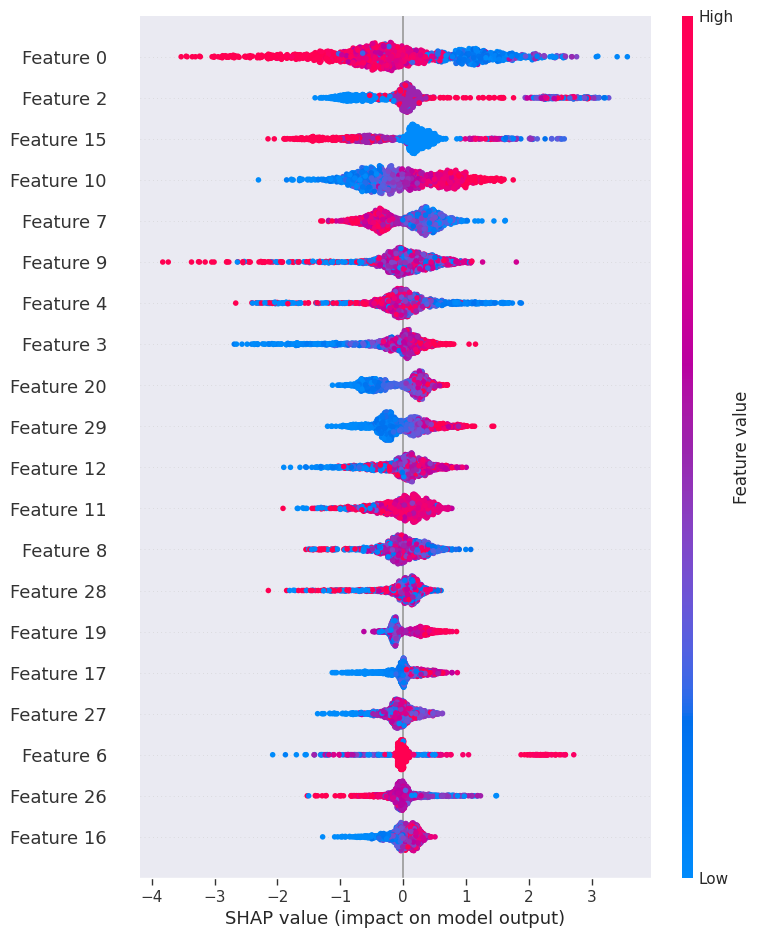

In [104]:
import shap

# Creating a SHAP explainer using the trained model
explainer = shap.Explainer(model)
# Calculating SHAP values for the test set
shap_values = explainer(X_test)
# Generating a summary plot of SHAP values to visualize feature importance
shap.summary_plot(shap_values, X_test)


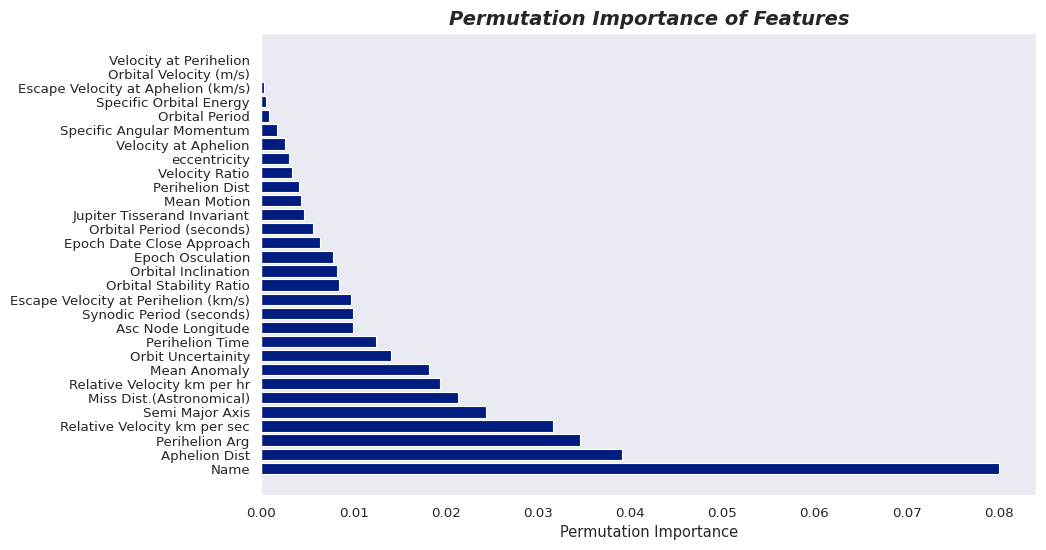

In [105]:
from sklearn.inspection import permutation_importance

# Calculating permutation importance of the model using the test set
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

import pandas as pd

# Creating a DataFrame to hold feature names and their corresponding importance scores
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': perm_importance.importances_mean  # Mean importance scores
})

# Sorting the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

# Plotting the permutation importance of features
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Permutation Importance')  # Labeling for the x-axis
plt.title('Permutation Importance of Features', fontsize=14, fontstyle='italic', fontweight='bold')  # Title of the plot
plt.show()  # Displaying the plot



## ***5. Anamoly Detection***

#### ***Using Inbuilt Library(IsolationForest)***

#### ***Isolation Forest***

**Overview :** Isolation Forest is an ensemble-based anomaly detection method that constructs multiple decision trees. The core idea is to isolate anomalies by randomly selecting features and splitting values. Anomalies are easier to isolate because they are few and different.

*italicized text*

**Advantages :**
* No Distributional Assumptions: Unlike many traditional statistical methods (e.g., Z-scores), Isolation Forest does not assume any specific distribution of the data. This flexibility allows it to work well with various types of data, including non-Gaussian distributions.
* Robust to Noise: It is less affected by noise compared to other methods because it focuses on isolating instances rather than modeling normal behavior.
* Good in High Dimensions: Works well even with high-dimensional data, where other methods may struggle.

**Sensitivity :**
* Parameter Tuning: While Isolation Forest has many strengths, it is sensitive to its parameters .The choice of how many trees to construct can impact performance. Too few trees may lead to underfitting, while too many can lead to overfitting.
* Contamination Rate: This parameter indicates the proportion of anomalies expected in the dataset.

  * Inaccurate Setting: If the contamination rate is set too high, the model may classify too many normal points as anomalies, whereas a low setting might cause it to overlook actual anomalies.

In [106]:
from sklearn.ensemble import IsolationForest

# Initializing the Isolation Forest model with a specified contamination rate and random state
iso_forest = IsolationForest(contamination=0.08, random_state=42)
# Fitting the model to the scaled features and predict anomalies
df3['if_anomaly_library'] = iso_forest.fit_predict(X_scaled)
# Converting the predictions: -1 indicates an anomaly, 1 indicates normal
df3['if_anomaly_library'] = df3['if_anomaly_library'].apply(lambda x: 1 if x == -1 else 0)
# Counting the number of detected anomalies
num_of_anomalies_lib = df3['if_anomaly_library'].sum()
print(f"Number of anomalies detected by IsolationForest: {num_of_anomalies_lib}")


Number of anomalies detected by IsolationForest: 337


#### ***Custom made Anamoly Detection Algorithms***

#### ***SciPy Z-Score***
**Overview :**
The SciPy Z-Score method calculates how many standard deviations away a data point is from the mean. A Z-score above a certain threshold indicates that the point is an anomaly.

**Advantages :**
* Fast Computation: Utilizing optimized libraries like SciPy ensures quick calculations of Z-scores.
* Interpretability: Z-scores provide a clear understanding of how extreme a data point is relative to the rest of the dataset.

**Sensitivity :**
* Assumption of Normality: The method assumes that the data follows a Gaussian distribution. In cases where the data is skewed or contains outliers, this assumption can lead to inaccurate anomaly detection.
* Influence of Outliers: The presence of outliers can significantly affect the mean and standard deviation, distorting the Z-score calculations and potentially leading to a high number of false positives.


#### ***Custom Z-Score***

**Overview :**
A custom implementation of the Z-score method allows for tailored adjustments to the calculation, such as using the median and median absolute deviation instead of mean and standard deviation. This approach can be more robust against outliers.

**Advantages :**
* Flexibility: You can customize the calculations according to your specific dataset and requirements, such as adjusting how central tendency and dispersion are computed.
* Robustness: By using median and median absolute deviation, the custom Z-score can better handle datasets with outliers and skewness.
Control: Provides greater control over how anomalies are defined and identified.

**Sensitivity :**
* Custom Assumptions: The effectiveness of the custom method depends on how well it is tailored to the dataset. If the underlying assumptions are incorrect, the results may still be poor.



| Aspect                      | Custom Z-Score                           | SciPy Z-Score                       |
|-----------------------------|------------------------------------------|-------------------------------------|
| **Implementation**          | Requires manual coding and customization | Built-in function, easier to use    |
| **Calculation Method**      | Can use median and MAD for robustness   | Uses mean and standard deviation     |
| **Robustness**              | More robust to outliers and skewness    | Sensitive to outliers                |
| **Flexibility**             | Highly customizable                      | Limited customization                |
| **Performance**             | May vary based on implementation         | Optimized for performance            |
| **Interpretability**        | Custom results may require explanation   | Clear and straightforward            |



In [107]:
from scipy import stats

# Calculating the Z-scores for the scaled features
z_scores = stats.zscore(X_scaled)

# Defining a threshold for identifying anomalies
threshold = 3.5

# Creating a new column in the DataFrame to indicate anomalies based on Z-scores
# An anomaly is detected if any Z-score is greater than the threshold
df3['if_anomaly_scipy'] = (abs(z_scores) > threshold).any(axis=1).astype(int)

# Counting the number of detected anomalies
num_anomalies_scipy = df3['if_anomaly_scipy'].sum()
print(f"Number of anomalies detected by Z-score method: {num_anomalies_scipy}")


Number of anomalies detected by Z-score method: 231


In [108]:
import numpy as np

def custom_z_score(X):
    # Initializing an array to store Z-scores with the same shape as X
    z_scores = np.zeros(X.shape)

    # Looping over each feature (column) in the dataset
    for feature in range(X.shape[1]):
        # Calculating the mean and standard deviation for the current feature
        mean = np.mean(X[:, feature])
        std_dev = np.std(X[:, feature])

        # Checking for standard deviation of zero to avoid division by zero
        if std_dev == 0:
            z_scores[:, feature] = 0  # Set Z-scores to zero if standard deviation is zero
        else:
            # Calculating Z-scores using the formula (value - mean) / std_dev
            z_scores[:, feature] = (X[:, feature] - mean) / std_dev

    return z_scores

# Defining a threshold for identifying anomalies
threshold = 4
# Calling the custom Z-score function and calculate anomalies
z_scores = custom_z_score(X_scaled)
# Creating a new column to indicate anomalies based on custom Z-scores
# An anomaly is detected if any Z-score is greater than the threshold
df3['if_anomaly_custom'] = (np.abs(z_scores) > threshold).any(axis=1).astype(int)
# Counting the number of detected anomalies
num_anomalies_custom = df3['if_anomaly_custom'].sum()
print(f"Number of anomalies detected by custom Z-score method: {num_anomalies_custom}")


Number of anomalies detected by custom Z-score method: 178


In [109]:
# Print the number of anomalies detected by each method
# Display the number of anomalies detected by the Isolation Forest method
print(f"Number of anomalies detected by IsolationForest: {num_of_anomalies_lib}")
# Display the number of anomalies detected by the Z-score method using SciPy
print(f"Number of anomalies detected by Scipy Z-score method: {num_anomalies_scipy}")
# Display the number of anomalies detected by the custom Z-score method
print(f"Number of anomalies detected by Custom Z-score method: {num_anomalies_custom}")


Number of anomalies detected by IsolationForest: 337
Number of anomalies detected by Scipy Z-score method: 231
Number of anomalies detected by Custom Z-score method: 178


#### ***Analysis of Algorithms***

In [110]:
# Calculating the number of examples flagged as anomalies by both Isolation Forest and SciPy Z-Score
both_flagged = (df3['if_anomaly_library'] & df3['if_anomaly_scipy']).sum()
print(f"Number of examples flagged by both IsolationForest and Scipy Z-Score : {both_flagged}")
# Calculating the number of examples flagged as anomalies by both Isolation Forest and Custom Z-Score
both_flagged = (df3['if_anomaly_library'] & df3['if_anomaly_custom']).sum()
print(f"Number of examples flagged by both IsolationForest and Custom Z-Score : {both_flagged}")
# Calculating the number of examples flagged as anomalies by both Custom Z-Score and SciPy Z-Score
both_flagged = (df3['if_anomaly_custom'] & df3['if_anomaly_scipy']).sum()
print(f"Number of examples flagged by both Custom and SciPy Z-Score : {both_flagged}")


Number of examples flagged by both IsolationForest and Scipy Z-Score : 102
Number of examples flagged by both IsolationForest and Custom Z-Score : 80
Number of examples flagged by both Custom and SciPy Z-Score : 178


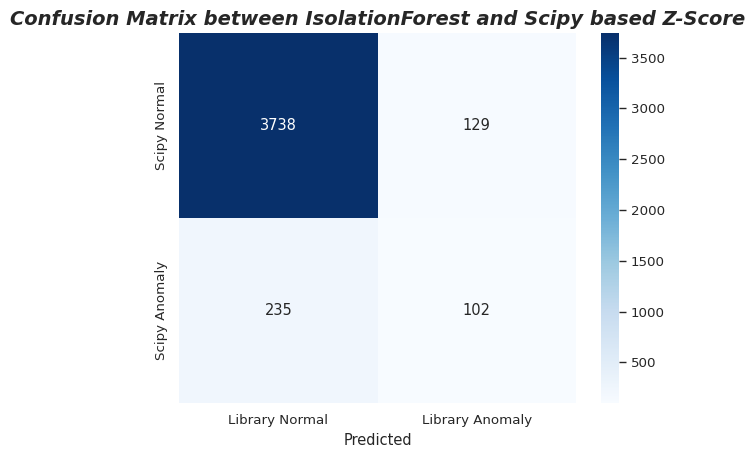

In [111]:
# Creating a confusion matrix to compare the anomaly predictions from IsolationForest and SciPy Z-Score
conf_matrix = confusion_matrix(df3['if_anomaly_library'], df3['if_anomaly_scipy'])
# Creating a heatmap to visualize the confusion matrix
sns.heatmap(
    conf_matrix,                          # The confusion matrix data
    annot=True,                           # Annotate cells with the numeric value
    fmt="d",                              # Format of the annotations (integer)
    cmap="Blues",                         # Color map for the heatmap
    xticklabels=['Library Normal', 'Library Anomaly'],  # Labels for the x-axis
    yticklabels=['Scipy Normal', 'Scipy Anomaly']       # Labels for the y-axis
)
# Setting the title and label for the x-axis
plt.title('Confusion Matrix between IsolationForest and Scipy based Z-Score', fontsize=14, fontstyle='italic', fontweight='bold')
plt.xlabel('Predicted')
# Displaying the heatmap
plt.show()


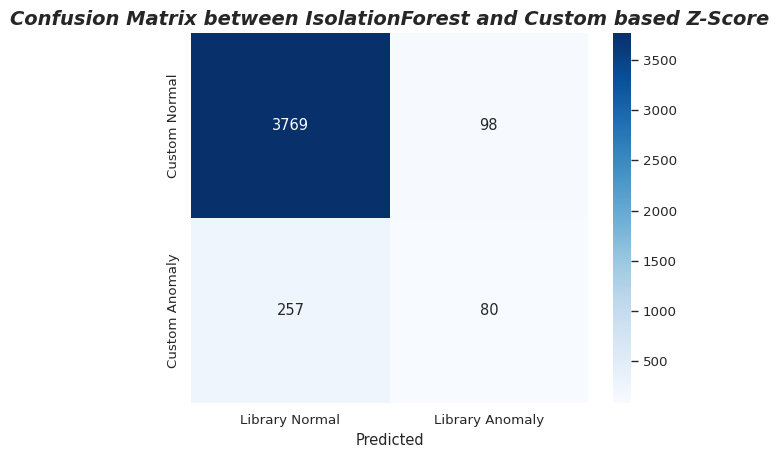

In [112]:
# Creating a confusion matrix to compare the anomaly predictions from IsolationForest and Custom Z-Score
conf_matrix = confusion_matrix(df3['if_anomaly_library'], df3['if_anomaly_custom'])
# Creating a heatmap to visualize the confusion matrix
sns.heatmap(
    conf_matrix,                          # The confusion matrix data
    annot=True,                           # Annotate cells with the numeric value
    fmt="d",                              # Format of the annotations (integer)
    cmap="Blues",                         # Color map for the heatmap
    xticklabels=['Library Normal', 'Library Anomaly'],  # Labels for the x-axis
    yticklabels=['Custom Normal', 'Custom Anomaly']       # Labels for the y-axis
)

# Setting the title and label for the x-axis
plt.title('Confusion Matrix between IsolationForest and Custom based Z-Score', fontsize=14, fontstyle='italic', fontweight='bold')
plt.xlabel('Predicted')
# Displaying the heatmap
plt.show()
